In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset contains the details of input and output variable of of redwine. Here, quality column is target varaible.

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

The dataset contains 1599 rows and 12 columns. Out of 12 columns quality column is our dependent and target variable.

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

This does not represent the data type of values present inside these columns. It is only representing the data type of columns names. 

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are only two types of data in the dataset i.e float64,int64 .

In [9]:
#checking the null values in the columns
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in this dataset.

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This gives the brief about the dataset.

<Axes: >

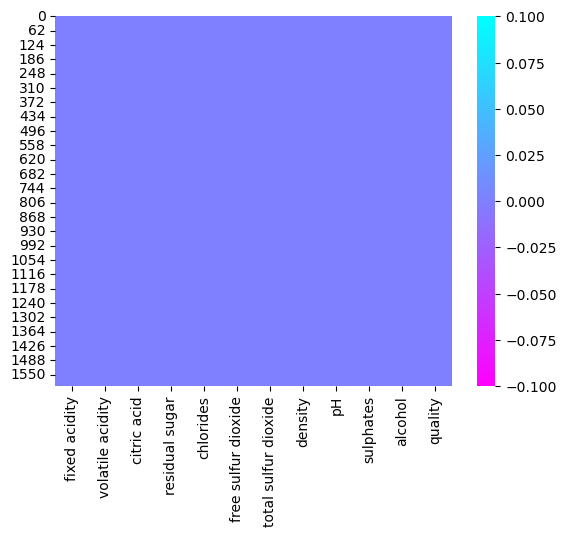

In [12]:
sns.heatmap(df.isnull(),cmap = "cool_r")

In [13]:
#checking the unique values in quality column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
df['quality'].nunique()

6

In [15]:
#checking the count of each unique value in columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [16]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This gives the statistical information of the numerical data present in the dataset.
We can observe:
1) There is no null value present in the dataset as the count of all the columns is equal to rows present in the data.
2) The mean value in all the columns is greater than the median except quality and density columns which means that data is skewed to the right in these columns.
3) We can see that there is difference between 75% and max hence there are outliers present inside the data.
4) We can also clearly see the standard deviation, min, and 25% percentile values from the describe method.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


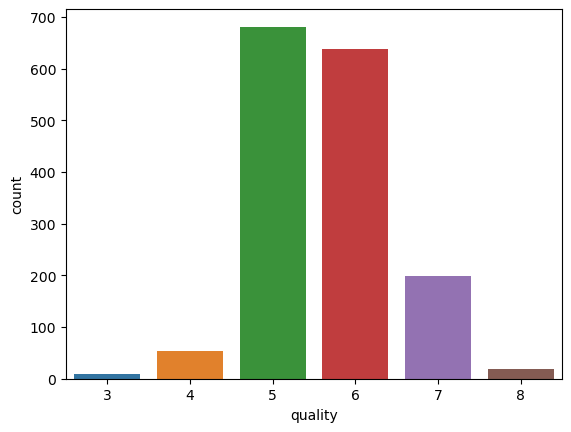

In [18]:
print(df["quality"].value_counts())
ax= sns.countplot(x='quality',data=df)
plt.show()

It can be observed that wine of quality rating 5 and 6 are the highest.

<Axes: xlabel='quality', ylabel='fixed acidity'>

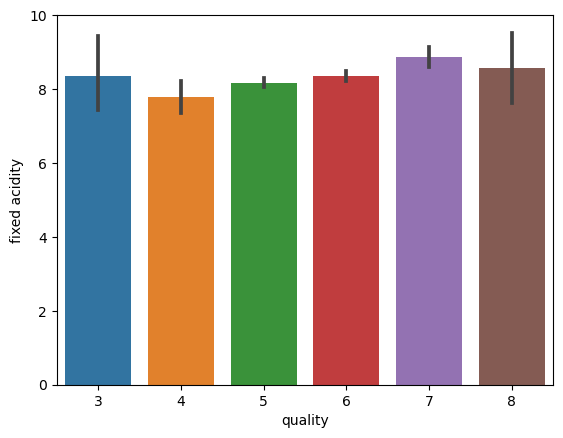

In [19]:
sns.barplot(x="quality",y="fixed acidity",data=df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

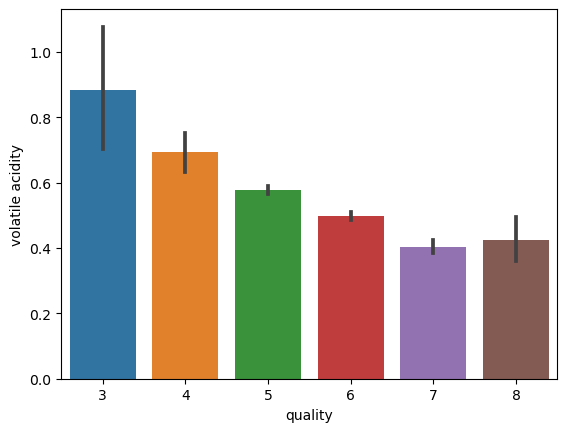

In [20]:
sns.barplot(x="quality",y="volatile acidity",data=df)

As the volatile acidity is decresing quality is incresing but after some point to increse quality volatile acidity is increased. As we can see after rating 7 volatile acidity is increased for quality rating 8

<Axes: xlabel='quality', ylabel='citric acid'>

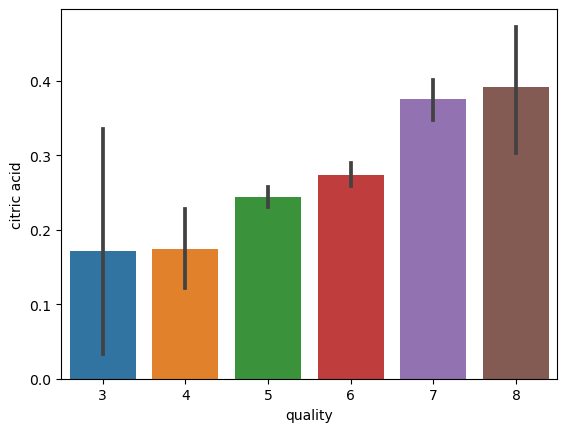

In [21]:
sns.barplot(x="quality",y="citric acid",data=df)

Citric acid and quality are directly proportional.

<Axes: xlabel='quality', ylabel='residual sugar'>

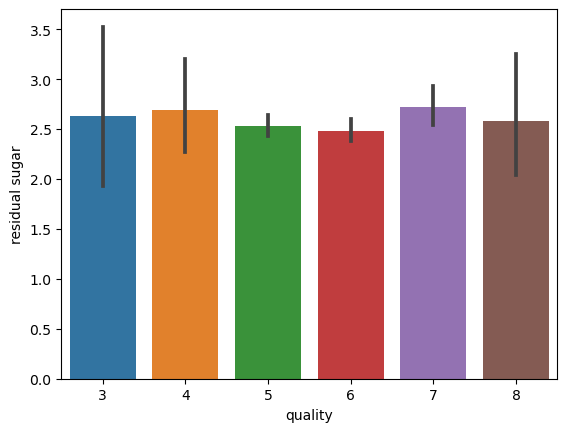

In [22]:
sns.barplot(x="quality",y="residual sugar",data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

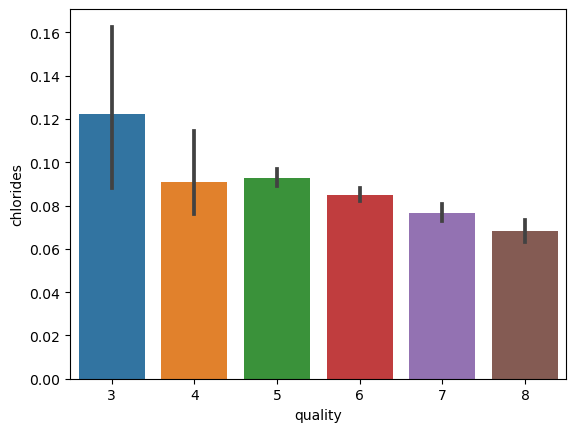

In [23]:
sns.barplot(x="quality",y="chlorides",data=df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

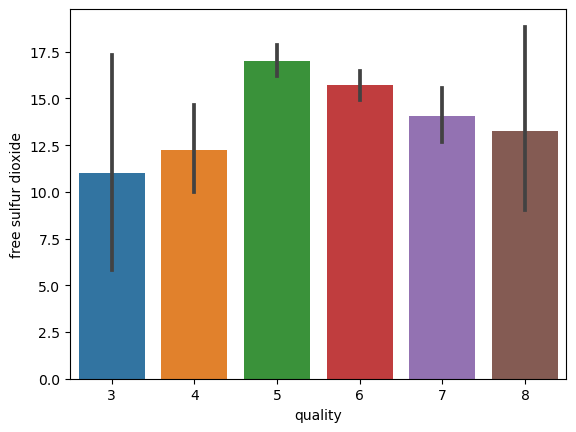

In [24]:
sns.barplot(x="quality",y="free sulfur dioxide",data=df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

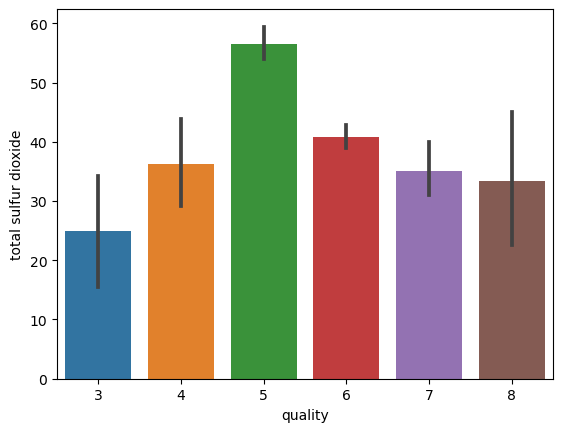

In [25]:
sns.barplot(x="quality",y="total sulfur dioxide",data=df)

<Axes: xlabel='quality', ylabel='density'>

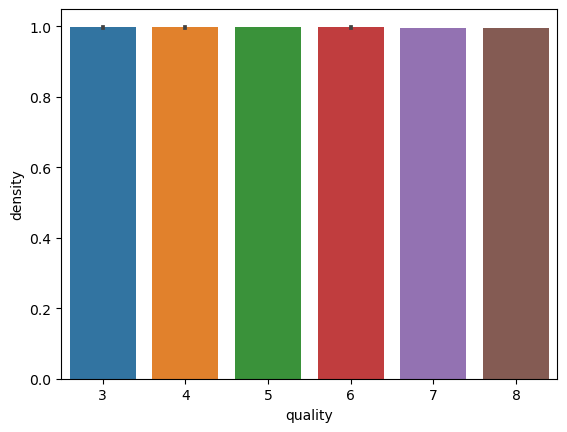

In [26]:
sns.barplot(x="quality",y="density",data=df)

Density is same in wine of each quality

<Axes: xlabel='quality', ylabel='pH'>

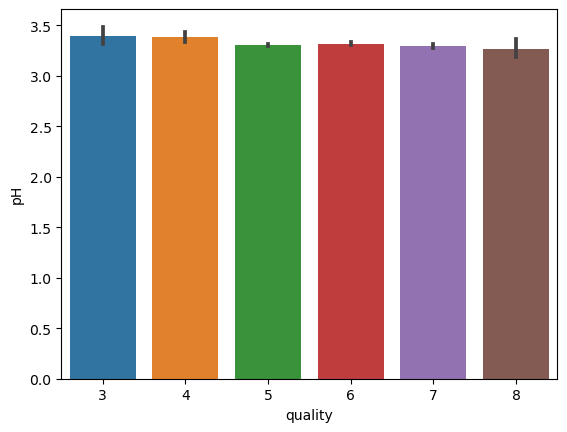

In [27]:
sns.barplot(x="quality",y="pH",data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

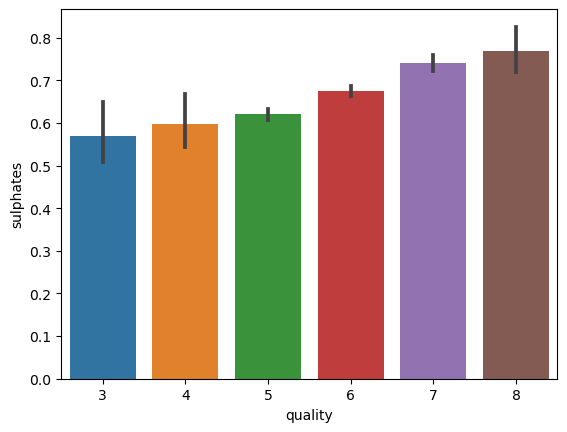

In [28]:
sns.barplot(x="quality",y="sulphates",data=df)

Quality and sulphates are directly proportional.

<Axes: xlabel='quality', ylabel='alcohol'>

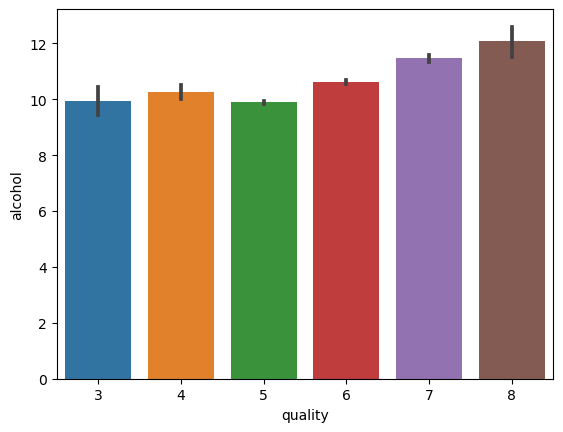

In [29]:
sns.barplot(x="quality",y="alcohol",data=df)

<Axes: >

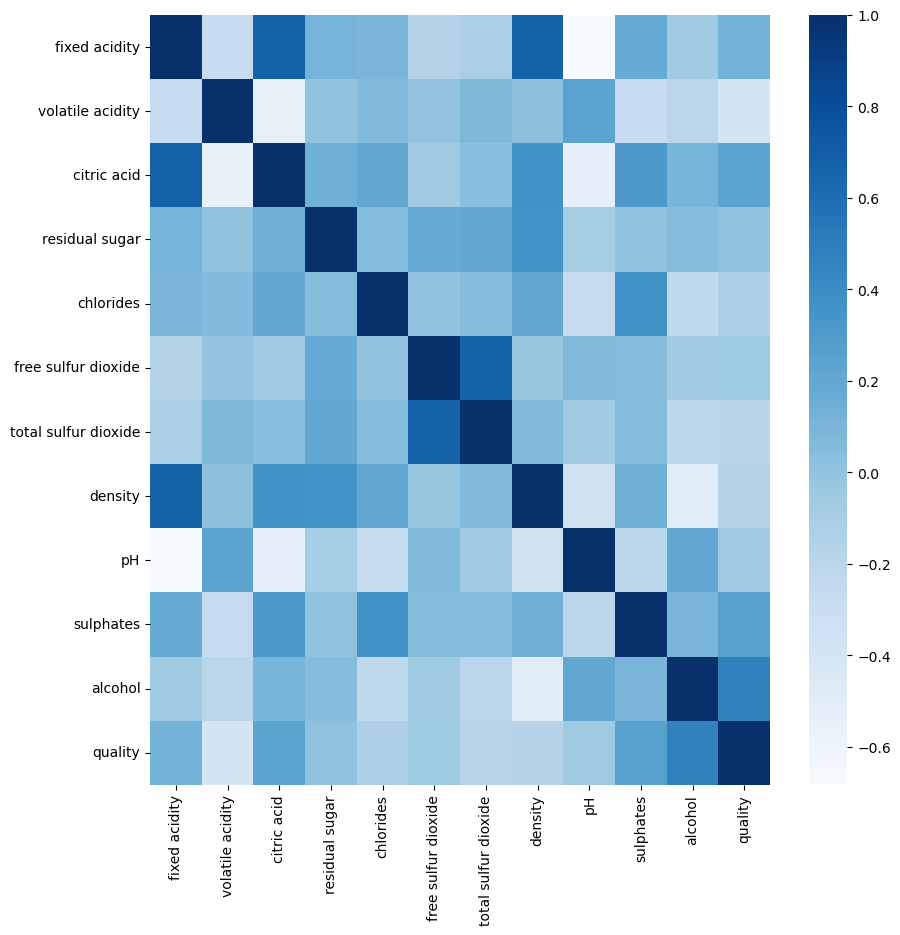

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Blues")

This heat map shows the correlation between different columns.
Some columns are positively correlated with each other and some are negatively correlated with each other.


In [31]:
df['good quality']= [1 if x>=7 else 0 for x in df['quality']]
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good quality
1106,8.2,0.230,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,6,0
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9,4,0
584,11.8,0.330,0.49,3.4,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7,1
1311,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.99290,3.33,0.59,12.8,6,0
782,9.0,0.820,0.05,2.4,0.081,26.0,96.0,0.99814,3.36,0.53,10.0,5,0


Dividing data as per the requirements given in the question. And labelling good quality as 1 and bad quality as 0.

In [32]:
#separating dependent and independent variables
X= df.drop(["quality","good quality"],axis=1)
Y= df['good quality']

Separating dependent and independent variables.

In [33]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [34]:
df['good quality'].value_counts()

0    1382
1     217
Name: good quality, dtype: int64

It can be seen that there are less number of good quality wine as compared to bad quality of wine.

In [35]:
#splitting data in training and testing data
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,random_state=7)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(1599, 11) (1119, 11) (480, 11)


In [37]:
#creating model
model= RandomForestClassifier()
model.fit(X_train, Y_train)
X_test_prediction= model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.9


In [41]:
#prediction
input_data= (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)
data= np.asarray(input_data)
reshape= data.reshape(1,-1)

In [42]:
output= model.predict(reshape)
print(output)

[1]


In [43]:
if(output[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')

Good quality wine
